In [1]:
from sklearn import datasets

x, y = datasets.make_moons(noise=0.15, random_state=42)

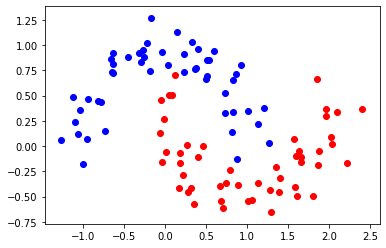

In [3]:
import matplotlib.pyplot as plt

def plot_dataset():
    plt.scatter(x[:, 0][y==0], x[:, 1][y==0], c='b')
    plt.scatter(x[:, 0][y==1], x[:, 1][y==1], c='r')
    
plot_dataset()
plt.show()

In [4]:
from sklearn import pipeline
from sklearn import svm
from sklearn import preprocessing

clf = pipeline.Pipeline((
    ('poly_features', preprocessing.PolynomialFeatures(degree=3)),
    ('scalar', preprocessing.StandardScaler()),
    ('svm_clf', svm.SVC(kernel='poly', degree=10, coef0=1,C=5))
))

clf.fit(x, y)

C:\Users\Nik\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scalar',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, cache_size=200, class_weight=None, coef0=1,
                     decision_function_shape='ovr', degree=10,
                     gamma='auto_deprecated', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

(1000, 1000)


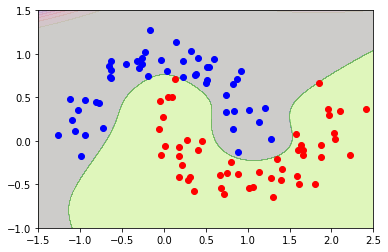

In [5]:
import numpy as np


x0s = np.linspace(-1.5, 2.5, 1000)
x1s = np.linspace(-1, 1.5, 1000)
x0, x1 = np.meshgrid(x0s, x1s)
n_x = np.c_[x0.ravel(), x1.ravel()]

y_hat = clf.predict(n_x).reshape(x0.shape)
y_dec = clf.decision_function(n_x).reshape(x0.shape)

plt.contourf(x0, x1, y_hat, alpha=0.2)
plt.contourf(x0, x1, y_dec, cmap=plt.cm.brg, alpha=0.1)
plot_dataset()

print(x0.shape)